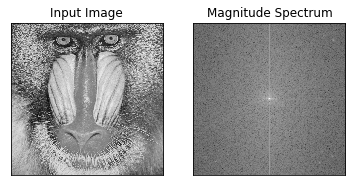

346.7520136654642 27.208686757487882
231.09295179399294 113.6314376723194


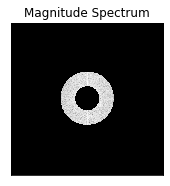

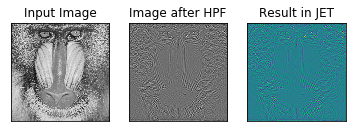

In [1]:
# TRABALHO 3 DE MC920

# ALUNO: Miguel Augusto Silva Guida   RA: 174847


import cv2
import numpy as np
import matplotlib.pyplot as plt



img = cv2.imread('baboon.png', 0)

#img = cv2.imread('butterfly.png', 0)
passaAlta = cv2.imread('passaFaixa.png', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

passaAlta[ passaAlta< 254] = 0
passaAlta[ passaAlta> 254] = 1

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



fshift *= passaAlta

# como saber a frequencia de corte? 
print(np.max(magnitude_spectrum), np.min(magnitude_spectrum))


magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

print(np.max(magnitude_spectrum), np.min(magnitude_spectrum[magnitude_spectrum > 0]))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

cv2.imwrite('img_back.png', img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base